In [39]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [40]:
path = 'a.png'

In [41]:
def preprocess(path):
    img = cv.imread(path)
    img = cv.resize(img,(450,450))
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img_blur = cv.GaussianBlur(gray,(5,5),1)
    img_threshold = cv.adaptiveThreshold(img_blur,255,1,1,11,2)
    return img_threshold,img
    


In [42]:
img_thresh,img = preprocess(path)

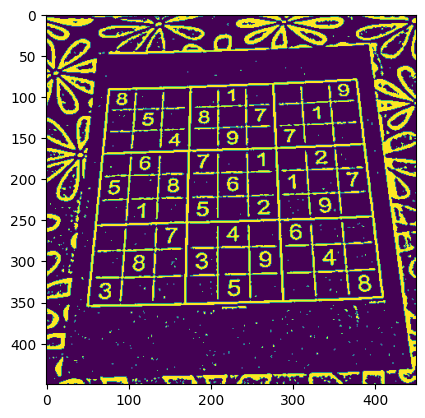

In [43]:
plt.imshow(img_thresh)

In [44]:
img_contour = img.copy()
img_biggest_contour = img.copy()

In [45]:
contours,hierarchy = cv.findContours(img_thresh,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img_contour,contours,-1,(0,255,0),3)


array([[[ 30,  68, 105],
        [ 30,  68, 105],
        [ 32,  67, 105],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[ 31,  69, 106],
        [ 31,  69, 106],
        [ 32,  67, 105],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [170, 169, 178],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[165, 169, 185],
        [166, 170, 186],
        [168, 172, 187],
        ...,
        [  0, 255,   0],
        [162, 160, 163],
        [158, 166, 171]],

       [[162, 166, 181],
        [163, 167, 183],
        [168, 172, 187],
        ...,
        [162, 165, 168],
        [166, 174, 176],
        [150, 161, 170]],

       [[168, 172, 187],
        [168, 172, 187],
        [168, 172, 187],
        ...,
        [154, 171, 177],
        [150, 169, 171],
        [153, 168, 179]]

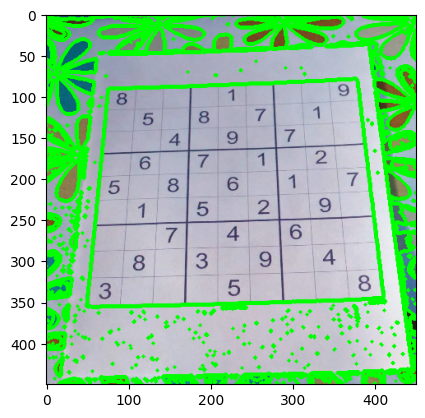

In [46]:
plt.imshow(img_contour)

In [47]:
def big_contours(contours):
    bigg = np.array([])
    max_area = 0
    for i in contours:
        area = cv.contourArea(i)
        if area>50:
            peri = cv.arcLength(i,True)
            approx = cv.approxPolyDP(i,0.02*peri,True)
            if area > max_area and len(approx)==4:
                bigg = approx
                max_area = area
    return bigg,max_area

In [48]:
biggest,maxarea = big_contours(contours)

In [49]:
maxarea,biggest

(88504.5,
 array([[[378,  79]],
 
        [[ 76,  90]],
 
        [[ 49, 355]],
 
        [[409, 345]]], dtype=int32))

In [50]:
def arrange(biggest):
    biggest = biggest.reshape((4,2))
    add = biggest.sum(axis = 1)
    points = np.zeros((4,2),dtype = np.int32)
    points[0] = biggest[np.argmin(add)]
    points[3] = biggest[np.argmax(add)]
    diff = np.diff(biggest,axis = 1)
    points[2] = biggest[np.argmax(diff)]
    points[1] = biggest[np.argmin(diff)]
    return points

In [51]:
points = arrange(biggest)

In [52]:
points = np.float32(points)

In [53]:
final_points = np.float32([[0,0],[450,0],[0,450],[450,450]])

In [54]:
matrix = cv.getPerspectiveTransform(points,final_points)

In [55]:
wrapped_img = cv.warpPerspective(img,matrix,(450,450))

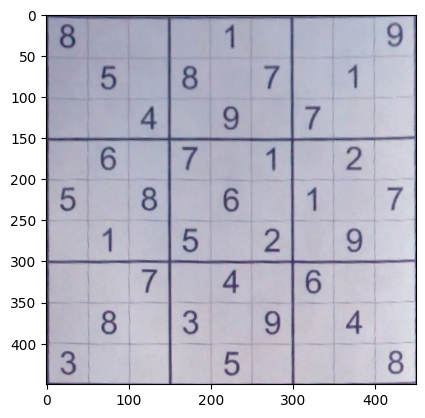

In [56]:
plt.imshow(wrapped_img)

In [57]:
wrapped_img.shape

(450, 450, 3)

In [58]:
img = wrapped_img